# Part I - (Fordgobike_2_2019_dataset)
## by (Kafayat Ibrahim)

[Introduction](/introduction)

[Prelimenary Wranglin](/prelimenaryWrangling)

[Univariant ](/univariant)

[Bivariant](/bivariant)

[Multivariant](/multivariant)







## Introduction
The data set is all about the 201902-fordgobike-tripdata, this contains february 2019 information of fordgo bike trip
the data provided contain 16 columns with about 183412. 

the rows provided include
 
 1   duration_sec,               int  
 2   start_time,                 object 
 3   end_time                   object 
 4   start_station_id,          float
 5   start_station_name ,        object 
 6   start_station_latitude ,    float
 7   start_station_longitude ,   float
 8   end_station_id ,            float
 9   end_station_name,           object 
 10   end_station_latitude,      float
 11  end_station_longitude,      float
 12  bike_id,                    int  
 13  user_type,                  object 
 14  member_birth_year,          float
 15  member_gender,              object 
 16  bike_share_for_all_trip,    object
 
 Some of the columns need to be clean to arrive at appropriate data for better analysis

## Preliminary Wrangling



In [255]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from math import radians, cos, sin, asin, sqrt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [256]:
fordge_bike=pd.read_csv('201902-fordgobike-tripdata.csv')
fordge_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Properties of the data set
  
  Variable           |        Description
-  ------                    ------------ 
  duration_sec       |          int64 
  -  ------ -                 ------- 
  start_time                   object 
  -  ------                  ------- 
  end_time       |              object 
  -  ------                   ------- 
  start_station_id  |           float64
  -  ------                   -------
  start_station_name |          object 
  - ------                    -------
  start_station_latitude |      float64
  - ------                     -------
  start_station_longitude |     float64
  - ------                     -------
  end_station_id |              float64
   - ------                   -------  
  end_station_name |            object 
  - ------                     -------
  end_station_latitude|         float64
  - ------                    -------
  end_station_longitude|        float64
  - ------                   -------
  bike_id  |                    int64  
  - ------                    -------
  user_type  |                  object 
  - ------                    -------
  member_birth_year |           float64
  - ------                   -------
  member_gender |               object 
  - ------                   -------
  bike_share_for_all_trip |     object
  - ------                   - ------
  ***
  
 1. Most of the variable are in string format which need to be converted
 2. The time columns can be broken down to days of the week, hours of the days period of the days and months although the data set provided is only for the month of february.
 3. we can also get the member age from the member year columns by subtracting the years from 2019

### Main feature(s)of Interest in the data set
 1. I am most interested in finding out what time of the day, day of the week the trip take place,and the station with more activities
 2. how has (age, gender, user type ) and duration of trip contribute to the riders activities 

In [257]:
fordge_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [258]:
fordge_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [259]:
fordge_bike['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [260]:
fordge_bike.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [261]:
fordge_bike.duplicated().sum()

0

## Assesment

###  quality issue spoted
1. the start time and end time is given as object data type
2. the 3 id's column is float and there is no calculation to be perform on this two columns
3. the bike_share_for_all_trip columns is object data type instead of boolean datatype
4. both the start station id,name and end station id, name has 197 missing value
5. member birth year and gender has 8265 missing value

In [262]:
fordge_copy=fordge_bike.copy()

### define
chage data type of start time and end time to date time series

In [263]:
col_date=['start_time','end_time']
for col in col_date:
    fordge_copy[col]=pd.to_datetime(fordge_copy[col])

In [264]:
fordge_copy['start_time'][0]

Timestamp('2019-02-28 17:32:10.145000')

In [265]:
fordge_copy['start_station_id']=fordge_copy['start_station_id'].fillna(0).astype(int)
fordge_copy['start_station_id']=fordge_copy['start_station_id'].fillna(0).astype(int)

In [266]:
fordge_copy['start_station_id']


0          21
1          23
2          86
3         375
4           7
         ... 
183407     27
183408     21
183409    278
183410    220
183411     24
Name: start_station_id, Length: 183412, dtype: int32

In [267]:
col_id=['start_station_id','end_station_id','bike_id']
for col in col_id:
    fordge_copy[col]=fordge_copy[col].astype(str)

In [268]:
fordge_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### Define
generate member_age from birth year

#### Code

In [269]:
fordge_copy['member_age']=fordge_copy['member_birth_year'].apply(lambda x: 2019-x)
fordge_copy['member_age']

0         35.0
1          NaN
2         47.0
3         30.0
4         45.0
          ... 
183407    23.0
183408    35.0
183409    29.0
183410    31.0
183411    30.0
Name: member_age, Length: 183412, dtype: float64

#### Define
extract hour, days, month, 
from start time and end time

#### code

In [270]:

## start time
fordge_copy['start_month']=fordge_copy['start_time'].dt.month_name()
fordge_copy['start_day']=fordge_copy['start_time'].dt.day_name()
fordge_copy['start_hour']=fordge_copy['start_time'].dt.hour
#fordge_copy['start_hour']=fordge_copy['start_hour'].astype(str)
## End time
fordge_copy['end_month']=fordge_copy['end_time'].dt.month_name()
fordge_copy['end_day']=fordge_copy['end_time'].dt.day_name()
fordge_copy['end_hour']=fordge_copy['end_time'].dt.hour
#fordge_copy['end_hour']=fordge_copy['end_hour'].astype(str)

### Define
Convert all the words in the strings columns to lower case

   #### Code

In [271]:
str_col=['start_station_name','end_station_name','user_type','member_gender','bike_share_for_all_trip','start_month','start_day','end_month','end_day']
for col in str_col:
    fordge_copy[col]=fordge_copy[col].str.lower()

#### Test

In [272]:
fordge_copy.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_month,start_day,start_hour,end_month,end_day,end_hour
117999,288,2019-02-11 19:44:05.222,2019-02-11 19:48:53.471,254,vine st at shattuck ave,37.880222,-122.269592,245.0,downtown berkeley bart,37.870139,...,1983.0,male,no,36.0,february,monday,19,february,monday,19
71044,375,2019-02-19 17:49:20.878,2019-02-19 17:55:36.371,15,san francisco ferry building (harry bridges pl...,37.795392,-122.394203,9.0,broadway at battery st,37.798572,...,1968.0,other,no,51.0,february,tuesday,17,february,tuesday,17
180152,423,2019-02-01 11:51:56.598,2019-02-01 11:58:59.868,266,parker st at fulton st,37.862464,-122.264791,258.0,university ave at oxford st,37.872355,...,1998.0,male,no,21.0,february,friday,11,february,friday,11
4478,541,2019-02-28 15:47:50.603,2019-02-28 15:56:51.974,44,civic center/un plaza bart station (market st ...,37.781074,-122.411738,31.0,raymond kimbell playground,37.783813,...,1992.0,male,no,27.0,february,thursday,15,february,thursday,15
135043,349,2019-02-08 15:59:41.831,2019-02-08 16:05:30.834,100,bryant st at 15th st,37.767100,-122.410662,67.0,san francisco caltrain station 2 (townsend st...,37.776639,...,1988.0,female,no,31.0,february,friday,15,february,friday,16
73949,1387,2019-02-19 11:50:59.032,2019-02-19 12:14:06.368,112,harrison st at 17th st,37.763847,-122.413004,112.0,harrison st at 17th st,37.763847,...,1987.0,male,no,32.0,february,tuesday,11,february,tuesday,12
69874,218,2019-02-19 18:55:38.264,2019-02-19 18:59:17.055,160,west oakland bart station,37.805318,-122.294837,235.0,union st at 10th st,37.807239,...,1983.0,female,no,36.0,february,tuesday,18,february,tuesday,18
89209,1372,2019-02-16 15:52:10.561,2019-02-16 16:15:02.963,105,16th st at prosper st,37.764285,-122.431804,42.0,san francisco city hall (polk st at grove st),37.778650,...,1998.0,female,no,21.0,february,saturday,15,february,saturday,16
1247,554,2019-02-28 19:26:09.540,2019-02-28 19:35:24.442,321,5th st at folsom,37.780146,-122.403071,114.0,rhode island st at 17th st,37.764478,...,1980.0,female,no,39.0,february,thursday,19,february,thursday,19
7839,813,2019-02-28 08:41:10.385,2019-02-28 08:54:43.931,370,jones st at post st,37.787327,-122.413278,81.0,berry st at 4th st,37.775880,...,1987.0,male,no,32.0,february,thursday,8,february,thursday,8


### Define
change data type of bike_share_for_all_trip to bool

In [273]:
fordge_copy['bike_share_for_all_trip']=(fordge_copy['bike_share_for_all_trip']=='yes')

In [274]:
fordge_copy['bike_share_for_all_trip'].dtype

dtype('bool')

In [275]:
fordge_copy['bike_share_for_all_trip'].value_counts()

False    166053
True      17359
Name: bike_share_for_all_trip, dtype: int64

In [276]:
fordge_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [277]:
fordge_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

#### What is the structure of your dataset?

there were initially 183412 with 16 columns in the data set but expanded to  23 columns the  expanded data set contains two date time columns, six float columns,one boolean, one int column, and 13 categorical (string) columns with no particular order 

### The main feature(s) of interest in your dataset?
1. I am most interested in finding out what time of the day, day of the week the trip take place,and the station with more activities.
2. I am also interested in finding out on how attribute such as (age,sex,usertype and trip duration) contributed to the activities of the location and time group

### The features in the dataset that will help support  investigation
1. I believe the start_date variable will provide me the information needed for this findings because I would be able to extract the day, week, and month columns. I expect most trips to take place in the morning, afternoon or evening hour, weekdays or weekend most expecially the tourist attraction center .
  


In [278]:
fordge_copy[['duration_sec','member_age']].describe()

,duration_sec,member_age
count,183412.000000,175147.000000
mean,726.078435,34.193563
std,1794.389780,10.116689
min,61.000000,18.000000
25%,325.000000,27.000000
50%,514.000000,32.000000
75%,796.000000,39.000000
max,85444.000000,141.000000


In [279]:
fordge_copy.to_csv('fordge_bike_2019.csv', index=False)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


#### 1. What is the average trip duration

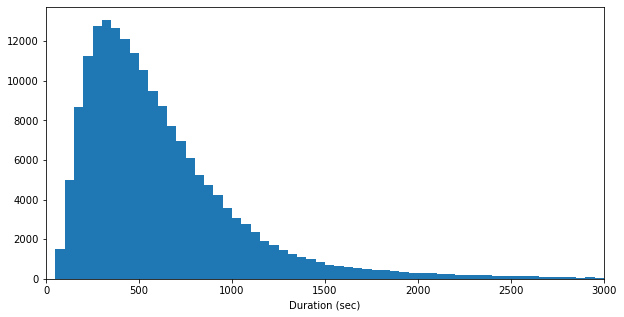

In [280]:
bin_size=50
bins=np.arange(50, fordge_copy['duration_sec'].max()+bin_size,bin_size)
plt.figure(figsize=[10,5])
plt.hist(data=fordge_copy, x='duration_sec', bins=bins);
plt.xlabel('Duration (sec)');
plt.xlim([0, 3000]);

The histogram is rightly skewed, their is long tail from 2000-3000, this clearly indicated that from 3000-100000 there is possiblity of having sparsely distributed data

let me use another bin size maybe 100 and reshape the xlim from 3000-100000

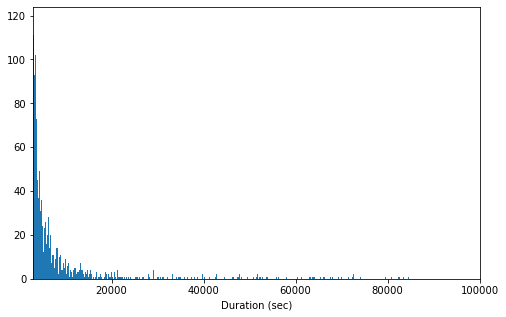

In [281]:
bin_size=100
bins=np.arange(3000, fordge_copy['duration_sec'].max()+bin_size,bin_size)
plt.figure(figsize=[8,5])
plt.hist(data=fordge_copy, x='duration_sec', bins=bins);
plt.xlabel('Duration (sec)');
plt.xlim([3000, 100000]);

the graph above shows that from 20000 to 84000 there are some data which has low frequency

let me use the log function for transformation  to improve visualization result 

In [282]:
np.log10(fordge_copy['duration_sec'].describe())

count    5.263428
mean     2.860984
std      3.253917
min      1.785330
25%      2.511883
50%      2.710963
75%      2.900913
max      4.931682
Name: duration_sec, dtype: float64

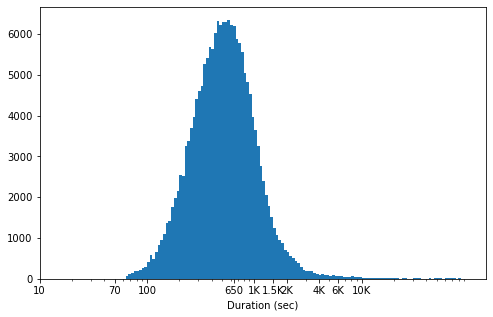

In [283]:
bin_size=0.025
bins= 10** np.arange(1.8,5+bin_size,bin_size)
plt.figure(figsize=[8,5])
plt.hist(data= fordge_copy, x='duration_sec', bins=bins);
plt.xscale('log')
plt.xticks([10,50,100,650,1000,1500,2000,4000,6000,10000], [10,70,100,650,'1K','1.5K','2K','4K','6K','10K'])
#plt.xticks([50,1e2,5e2,1e3,5e3,1e4,2e4,5e4,1e5 ],[50, '100', '500', '1k','5k','10k','20k','50k','100k'])
plt.xlabel('Duration (sec)');

in conclussion the average distribution of travel duration in seconds falls within 500-750

#### 2.  investigate the ride activities in respect of the days of the week
in this analysis i am goin to make use of the start day and end days as my variables

In [284]:
fordge_copy['start_day'].value_counts()

thursday     35197
tuesday      31813
wednesday    29641
friday       28981
monday       26852
sunday       15523
saturday     15405
Name: start_day, dtype: int64

In [285]:
fordge_copy['end_day'].value_counts()

thursday     35185
tuesday      31820
wednesday    29631
friday       28981
monday       26859
sunday       15523
saturday     15413
Name: end_day, dtype: int64

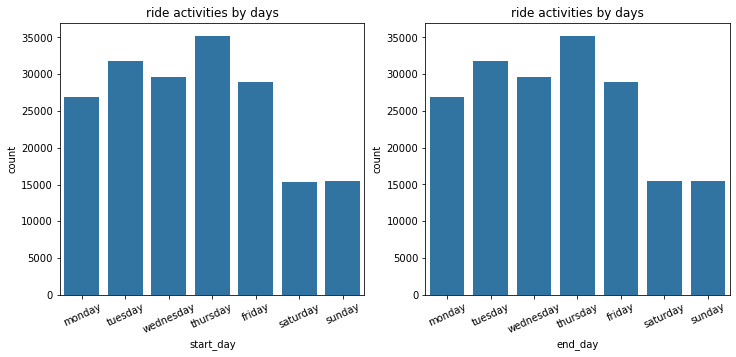

In [286]:
days_order=['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
base_color=sb.color_palette()[0]
sb.countplot(data=fordge_copy, x='start_day', order=days_order, color=base_color);
plt.title('ride activities by days');
plt.xticks(rotation=25);
plt.subplot(1,2,2)
base_color=sb.color_palette()[0]
sb.countplot(data=fordge_copy, x='end_day', order=days_order, color=base_color);
plt.title('ride activities by days');
plt.xticks(rotation=25);


I discovered that the riders  activies is most frequent during week days and perform lesser activities during the weekend , i will investigate futher if the weekly activities depend on user_type, or gender

#### 2ii investigate riders activities base on hours/period 

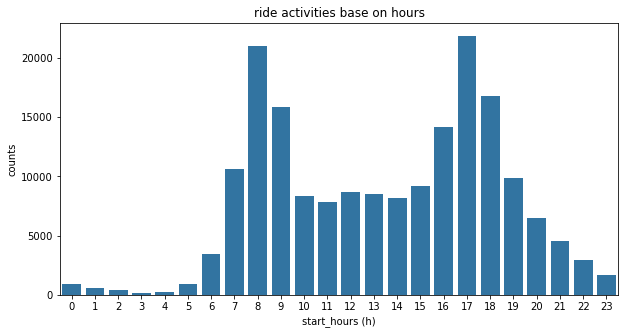

In [287]:
hour_order=np.arange(0,24)
plt.figure(figsize=[10,5]);
sb.countplot(data=fordge_copy, x='start_hour', color=base_color, order=hour_order);
plt.title('ride activities base on hours')
plt.xlabel('start_hours (h)');
plt.ylabel('counts');

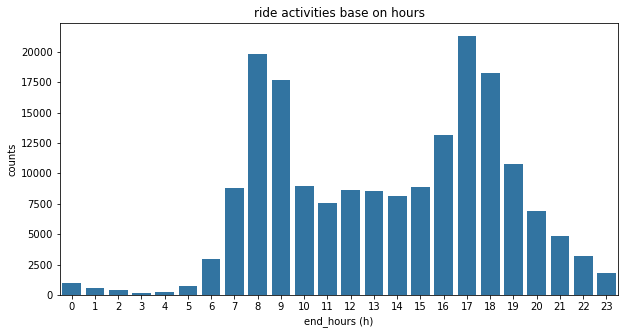

In [288]:
hour_order=np.arange(0,24)
plt.figure(figsize=[10,5]);
sb.countplot(data=fordge_copy, x='end_hour', color=base_color, order=hour_order);
plt.title('ride activities base on hours')
plt.xlabel('end_hours (h)');
plt.ylabel('counts');

from the two plot above is clearly shown that most ride activities fall during day break, 8, 9 17,19  perform most activities, it seems due to the job nature of the bike user most of the activies occure during early hours of day break, and in the evening hours when they tends to have close from work, so i will investigate this better at the bivariant plot 

### 2. the distribution of member age

In [289]:
fordge_copy['member_age'].describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

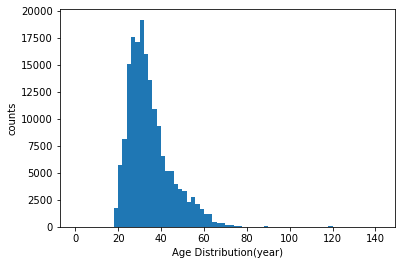

In [290]:
bin_size=2
bins=np.arange(0, fordge_copy['member_age'].max()+bin_size,bin_size)
plt.hist(data=fordge_copy, x='member_age', bins=bins);
plt.xlabel('Age Distribution(year)');
plt.ylabel('counts');

In [291]:
np.log10(fordge_copy['member_age'].describe())

count    5.243403
mean     1.533944
std      1.005038
min      1.255273
25%      1.431364
50%      1.505150
75%      1.591065
max      2.149219
Name: member_age, dtype: float64

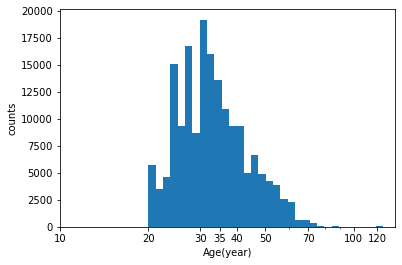

In [292]:
bin_size=0.025
bins=10** np.arange(1.3, 2.1+bin_size,bin_size)
plt.hist(data=fordge_copy, x='member_age', bins=bins);
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,100,120],[10,20,30,35,40,50,70,100,120]);
plt.ylabel('counts');
plt.xlabel('Age(year)');

from the graph above its clearly seen that most of the rider fall within the age of 30-35  with some rider which are above 100 years. so i will assume any rider that has age greater than 100 as an outlier

In [293]:
fordge_copy.query('member_age>100')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_month,start_day,start_hour,end_month,end_day,end_hour
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158,shattuck ave at telegraph ave,37.833279,-122.263490,173.0,shattuck ave at 55th st,37.840364,...,1900.0,male,True,119.0,february,thursday,19,february,thursday,19
10827,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343,bryant st at 2nd st,37.783172,-122.393572,375.0,grove st at masonic ave,37.774836,...,1900.0,male,False,119.0,february,wednesday,19,february,wednesday,19
16087,1131,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375,grove st at masonic ave,37.774836,-122.446546,36.0,folsom st at 3rd st,37.783830,...,1900.0,male,False,119.0,february,wednesday,8,february,wednesday,8
19375,641,2019-02-26 17:03:19.855,2019-02-26 17:14:01.619,9,broadway at battery st,37.798572,-122.400869,30.0,san francisco caltrain (townsend st at 4th st),37.776598,...,1900.0,male,False,119.0,february,tuesday,17,february,tuesday,17
21424,1424,2019-02-26 08:58:02.904,2019-02-26 09:21:47.749,375,grove st at masonic ave,37.774836,-122.446546,343.0,bryant st at 2nd st,37.783172,...,1900.0,male,False,119.0,february,tuesday,8,february,tuesday,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171996,1368,2019-02-03 17:33:54.607,2019-02-03 17:56:42.949,37,2nd st at folsom st,37.785000,-122.395936,375.0,grove st at masonic ave,37.774836,...,1900.0,male,False,119.0,february,sunday,17,february,sunday,17
173711,993,2019-02-03 09:45:30.464,2019-02-03 10:02:04.169,375,grove st at masonic ave,37.774836,-122.446546,36.0,folsom st at 3rd st,37.783830,...,1900.0,male,False,119.0,february,sunday,9,february,sunday,10
177708,1527,2019-02-01 19:09:28.387,2019-02-01 19:34:55.963,343,bryant st at 2nd st,37.783172,-122.393572,375.0,grove st at masonic ave,37.774836,...,1900.0,male,False,119.0,february,friday,19,february,friday,19
177885,517,2019-02-01 18:38:40.471,2019-02-01 18:47:18.392,25,howard st at 2nd st,37.787522,-122.397405,30.0,san francisco caltrain (townsend st at 4th st),37.776598,...,1902.0,female,False,117.0,february,friday,18,february,friday,18


#### investigate the most frequent/Visited  station in the data set

In [294]:
print (len(fordge_copy['start_station_name'].value_counts()))
start_st_name=fordge_copy['start_station_name'].value_counts()[:7]
order=start_st_name.index
start_st_name

329


market st at 10th st                                         3904
san francisco caltrain station 2  (townsend st at 4th st)    3544
berry st at 4th st                                           3052
montgomery st bart station (market st at 2nd st)             2895
powell st bart station (market st at 4th st)                 2760
san francisco ferry building (harry bridges plaza)           2710
san francisco caltrain (townsend st at 4th st)               2703
Name: start_station_name, dtype: int64

In [295]:
print (len(fordge_copy['end_station_name'].value_counts()))
end_st_name=fordge_copy['end_station_name'].value_counts()[:7]
order=end_st_name.index
end_st_name

329


san francisco caltrain station 2  (townsend st at 4th st)    4857
market st at 10th st                                         3973
montgomery st bart station (market st at 2nd st)             3647
san francisco ferry building (harry bridges plaza)           3368
powell st bart station (market st at 4th st)                 2997
san francisco caltrain (townsend st at 4th st)               2947
berry st at 4th st                                           2872
Name: end_station_name, dtype: int64

After looking at the two station name column the there are seven consistent station name that has more frequency out of the 329 station name present in the data set. I will create another set by filtering out the seven station names using the start station column

In [296]:
# from the data set the most top seven station name common in both start station name and end station name 
most_7=['market st at 10th st','san francisco caltrain station 2  (townsend st at 4th st)','berry st at 4th st','montgomery st bart station (market st at 2nd st)'
        ,'powell st bart station (market st at 4th st)','san francisco ferry building (harry bridges plaza)','san francisco caltrain (townsend st at 4th st)','berry st at 4th st']
fordge_copy_7=fordge_copy.loc[fordge_copy['start_station_name'].isin(most_7)].dropna()
fordge_copy_7

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_month,start_day,start_hour,end_month,end_day,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,montgomery st bart station (market st at 2nd st),37.789625,-122.400811,13.0,commercial st at montgomery st,37.794231,...,1984.0,male,False,35.0,february,thursday,17,march,friday,8
38,1066,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,58,market st at 10th st,37.776619,-122.417385,145.0,29th st at church st,37.743684,...,1992.0,female,False,27.0,february,thursday,23,february,thursday,23
42,1554,2019-02-28 23:20:24.089,2019-02-28 23:46:19.019,15,san francisco ferry building (harry bridges pl...,37.795392,-122.394203,284.0,yerba buena center for the arts (howard st at ...,37.784872,...,1972.0,male,False,47.0,february,thursday,23,february,thursday,23
54,401,2019-02-28 23:30:52.471,2019-02-28 23:37:33.955,58,market st at 10th st,37.776619,-122.417385,62.0,victoria manalo draves park,37.777791,...,1990.0,female,False,29.0,february,thursday,23,february,thursday,23
63,239,2019-02-28 23:28:42.709,2019-02-28 23:32:41.769,21,montgomery st bart station (market st at 2nd st),37.789625,-122.400811,343.0,bryant st at 2nd st,37.783172,...,1986.0,male,False,33.0,february,thursday,23,february,thursday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183364,892,2019-02-01 01:08:43.731,2019-02-01 01:23:35.763,58,market st at 10th st,37.776619,-122.417385,133.0,valencia st at 22nd st,37.755213,...,2000.0,male,False,19.0,february,friday,1,february,friday,1
183365,932,2019-02-01 01:07:51.908,2019-02-01 01:23:24.370,58,market st at 10th st,37.776619,-122.417385,133.0,valencia st at 22nd st,37.755213,...,2000.0,female,False,19.0,february,friday,1,february,friday,1
183366,932,2019-02-01 01:07:49.971,2019-02-01 01:23:22.528,58,market st at 10th st,37.776619,-122.417385,133.0,valencia st at 22nd st,37.755213,...,2000.0,female,False,19.0,february,friday,1,february,friday,1
183399,958,2019-02-01 00:12:24.247,2019-02-01 00:28:22.738,67,san francisco caltrain station 2 (townsend st...,37.776639,-122.395526,58.0,market st at 10th st,37.776619,...,1993.0,male,False,26.0,february,friday,0,february,friday,0


In [297]:
print (len(fordge_copy_7['start_station_name'].value_counts()))
y=fordge_copy_7['start_station_name'].value_counts()
y_order=y.index
y

7


market st at 10th st                                         3649
san francisco caltrain station 2  (townsend st at 4th st)    3408
berry st at 4th st                                           2952
montgomery st bart station (market st at 2nd st)             2711
powell st bart station (market st at 4th st)                 2620
san francisco caltrain (townsend st at 4th st)               2577
san francisco ferry building (harry bridges plaza)           2541
Name: start_station_name, dtype: int64

##### investigate the frequency of the top 7 stations

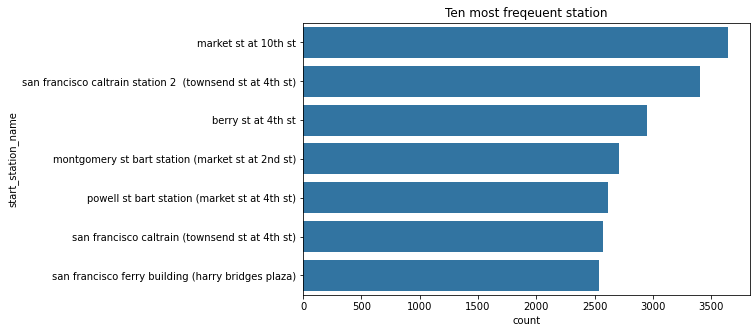

In [298]:
plt.figure(figsize=[8,5])
sb.countplot(data=fordge_copy_7, y='start_station_name', order=y_order, color=base_color);
plt.title('Ten most freqeuent station');

the market st at 10th st has highest frequency this might be because of the station location, although i will investigate the station location more for better clerification

#### investigate the average trip duration of the top 7 stations

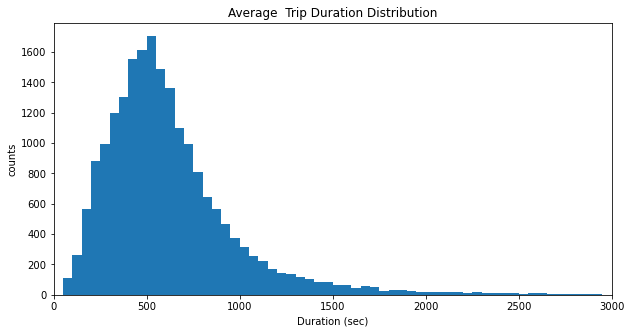

In [299]:
# using histogram
bin_size=50
bins=np.arange(50, fordge_copy_7['duration_sec'].max()+bin_size,bin_size)
plt.figure(figsize=[10,5])
plt.hist(data=fordge_copy_7, x='duration_sec', bins=bins);
plt.xlabel('Duration (sec)');
plt.xlim([0, 3000]);
plt.ylabel('counts')
plt.title('Average  Trip Duration Distribution');




using normal histogram plot, the graph is skeew to the right meaning there are some distribution at the extreem end, but i am much concern about the populated area.I will introduce log for proper transformation

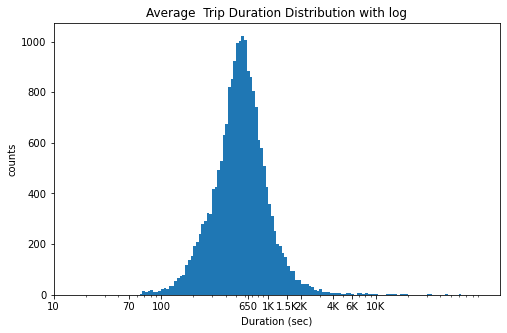

In [300]:
#ploting with log
bin_size=0.025
bins= 10** np.arange(1.8,5+bin_size,bin_size)
plt.figure(figsize=[8,5])
plt.hist(data= fordge_copy_7, x='duration_sec', bins=bins);
plt.xscale('log')
plt.xticks([10,50,100,650,1000,1500,2000,4000,6000,10000], [10,70,100,650,'1K','1.5K','2K','4K','6K','10K'])
plt.xlabel('Duration (sec)');
plt.ylabel('counts')
plt.title('Average  Trip Duration Distribution with log');


After plotting with the logarithm function the average duration of the trip fall around 650 seconds

#### investigate the average age distribution of bike rider across the top 7 station

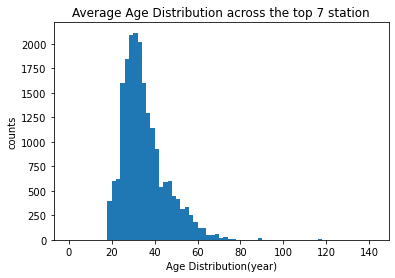

In [301]:
bin_size=2
bins=np.arange(0, fordge_copy_7['member_age'].max()+bin_size,bin_size)
plt.hist(data=fordge_copy_7, x='member_age', bins=bins);
plt.xlabel('Age Distribution(year)');
plt.ylabel('counts');
plt.title('Average Age Distribution across the top 7 station');

the average age of riders falls within 30-35 and the graph has some distribution in between 80-100 1nd 100-120

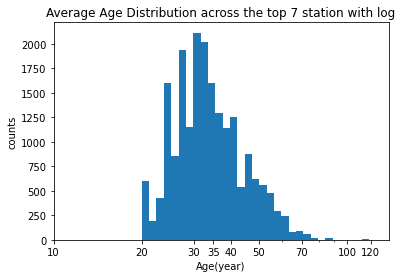

In [302]:
# use log function for proper transformation of the data
bin_size=0.025
bins=10** np.arange(1.3, 2.1+bin_size,bin_size)
plt.hist(data=fordge_copy_7, x='member_age', bins=bins);
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,100,120],[10,20,30,35,40,50,70,100,120]);
plt.ylabel('counts');
plt.xlabel('Age(year)');
plt.title('Average Age Distribution across the top 7 station with log');

the average distribution of age is 35,  i cosider all value above 100 as outliers

In [303]:
fordge_copy_7['period_day'] = 'morning'
fordge_copy_7['period_day'][(fordge_copy_7['start_hour'] >= 12) & (fordge_copy_7['start_hour'] <= 17)] = 'afternoon'
fordge_copy_7['period_day'][(fordge_copy_7['start_hour'] >= 18) & (fordge_copy_7['start_hour'] <= 23)] = 'night'

In [304]:
x=fordge_copy_7['period_day'].value_counts()
x_order=x.index
x

morning      8718
afternoon    7286
night        4454
Name: period_day, dtype: int64

#### Storage

In [305]:
fordge_copy_7.to_csv('top7_bike_data.csv', index=False)

#### investigate the period of the day variable

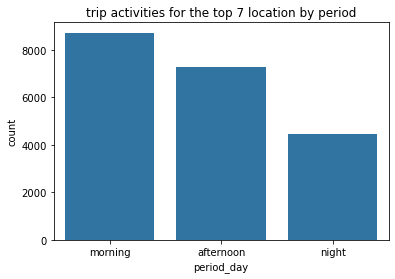

In [306]:
base_color=sb.color_palette()[0]
sb.countplot(data=fordge_copy_7,x='period_day',order=x_order,color=base_color);
plt.title('trip activities for the top 7 location by period');

from the bar chart it shows that there are more trip in the morning and afternoon compare to night although i will investigate futher with bivariant and multi variant visualization

#### investigate other characteristic that can affect the time and location

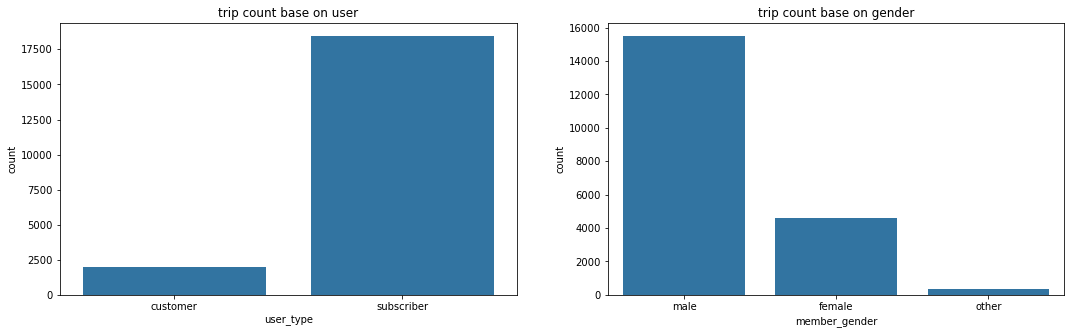

In [307]:
plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
base_color=sb.color_palette()[0]
sb.countplot(data=fordge_copy_7, x='user_type',color=base_color);
plt.title('trip count base on user');

plt.subplot(1,2,2)
sb.countplot(data=fordge_copy_7, x='member_gender',color=base_color);
plt.title('trip count base on gender');


In [308]:
fordge_copy_7['user_type'].value_counts()

subscriber    18451
customer       2007
Name: user_type, dtype: int64

In [309]:
male=fordge_copy_7['member_gender'].value_counts()[0]
female=fordge_copy_7['member_gender'].value_counts()[1]
other=fordge_copy_7['member_gender'].value_counts()[2]
total=len(fordge_copy_7['member_gender'])

In [310]:
print(f'the percentage of male rider is {(male/total)*100}')
print(f'the percentage of female rider is {(female/total)*100}')
print(f'the percentage of rider with gender other is {(other/total)*100}')

the percentage of male rider is 75.7649819141656
the percentage of female rider is 22.58774073711995
the percentage of rider with gender other is 1.6472773487144394


In [311]:
#percentage of subscriber and customers
print('the percentage of bike in respect of the subscriber is:',(fordge_copy_7['user_type'].value_counts()[0]/len (fordge_copy_7['user_type']))*100)
print('the percentage of bike in respect of the customers is:',(fordge_copy_7['user_type'].value_counts()[1]/len (fordge_copy_7['user_type']))*100)

the percentage of bike in respect of the subscriber is: 90.18965685795288
the percentage of bike in respect of the customers is: 9.81034314204712


the percentage of bike in respect of the subscriber is: 90.18965685795288
the percentage of bike in respect of the customers is: 9.81034314204712
Due to the pricing nature most user prefer to be a subscriber rather than a customer, from my resserach i discovered that fordge bike is been hired for  10 Dollars     
per day while 15 Dollars per month and  149 Dollars  per year once subscribe
also the percentage of male rider is 75.7649819141656 while the percentage of female rider is 22.58774073711995 and the percentage of rider with gender other is 1.6472773487144394

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Transformations
The variables, age and duration_sec, look like right skewed, so I look into these two variables using a log transform. Under the transformations, age's data has one big peak between 30 and 40 years old and some small peak. Duration's data looks like unimodel with one peak between 550 and 700 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I am most interested in the station with the most trip so i filter my data set with 7 most frequent station out of the 329 stations
This include
* market st at 10th st                                         
* san francisco caltrain station 2  (townsend st at 4th st)    
* berry st at 4th st                                           
* montgomery st bart station (market st at 2nd st)             
* powell st bart station (market st at 4th st)                 
* san francisco ferry building (harry bridges plaza)           
* san francisco caltrain (townsend st at 4th st)               

 * for age distribution there are some members age which are above 100 this might be outlier, although i am going to ignore that for now.
 * The gender varible has other category, it might be that the rider fail to disclose there gender or there is data entry error. 


## Bivariate Exploration


In [312]:
# prepare list of numerical, and categorical variable
num_var=['duration_sec','member_age']
time_var=['start_day','period_day']
attr_var=['member_gender','user_type']

#### 1. Numeric Varible correllation plot

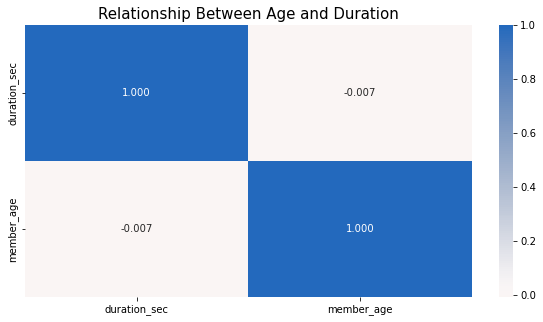

In [313]:

plt.figure(figsize=[10,5])
sb.heatmap(fordge_copy_7[num_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration', fontsize=15);

#### Let me use Pair Grid to check the flow of the data for better understanding

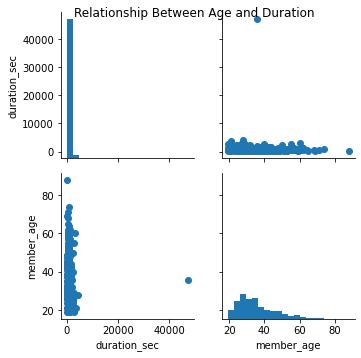

In [314]:
fordge_copy_7_samp=fordge_copy_7.sample(n= 500, replace = False)
g = sb.PairGrid(data = fordge_copy_7_samp, vars = num_var);
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)
g.fig.suptitle('Relationship Between Age and Duration');

From the heat map showing the correllation between the two numerical variable, it shows that the member_age and duration_sec are negatively correlated which means that there is lesser occurence for rider with higher age.

In [315]:
#convert the categorical data to categirical data types base on order
cat_data={'start_station_name':['market st at 10th st','san francisco caltrain station 2  (townsend st at 4th st)','berry st at 4th st','montgomery st bart station (market st at 2nd st)'
        ,'powell st bart station (market st at 4th st)','san francisco caltrain (townsend st at 4th st)','san francisco ferry building (harry bridges plaza)'
         ],
         'start_day':['monday','tuesday','wednesday','thursday','friday','saturday','sunday'],
         'period_day':['morning','afternoon','night'] 
      }
for var in cat_data:
    col_dtype=pd.api.types.CategoricalDtype(ordered=True, categories=cat_data[var])
    fordge_copy_7[var]=fordge_copy_7[var].astype(col_dtype)
    

#### 2. Categorical variables by plotting countplot: top 7 stations by times (period of day, days of the week)

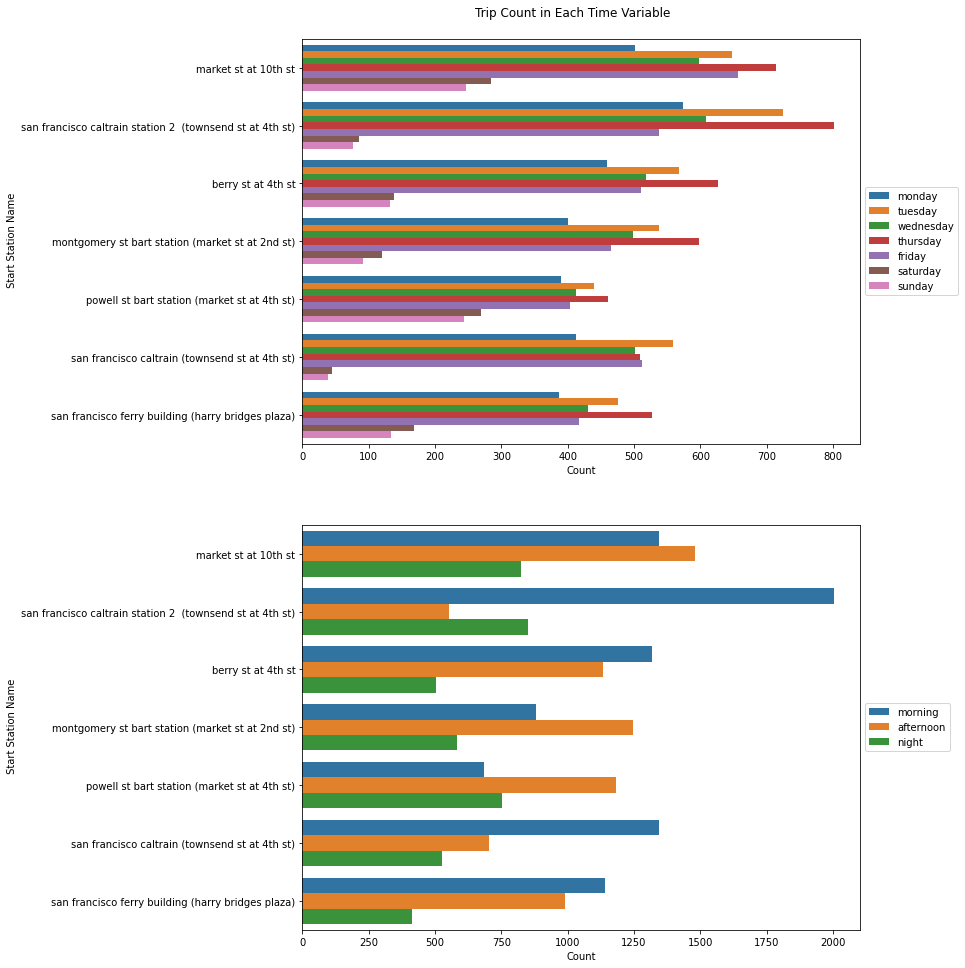

In [316]:
# 
fig=plt.figure(figsize=(10,15))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trip Count in Each Time Variable', fontsize=12)
for var in range(1,3):
    ax=fig.add_subplot(2,1,var)
    sb.countplot(data=fordge_copy_7, y='start_station_name', hue=time_var[var-1]);
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5));
    plt.ylabel(' Start Station Name');
    plt.xlabel('Count');


1. The data according to the selected station indicated that half of the location has more ride in the morning while the second  half has their trip in the afternoon.
2. most of the trip always occur during the weekday that is from monday to friday and less occurence during the weekend eg. Saturday and Sunday there are some station which has higher values during the weekend compare to other station weekend activities but generally most trip happen during the week days

#### 3. categorical variable top 7 stations with their attribute  user type and gender

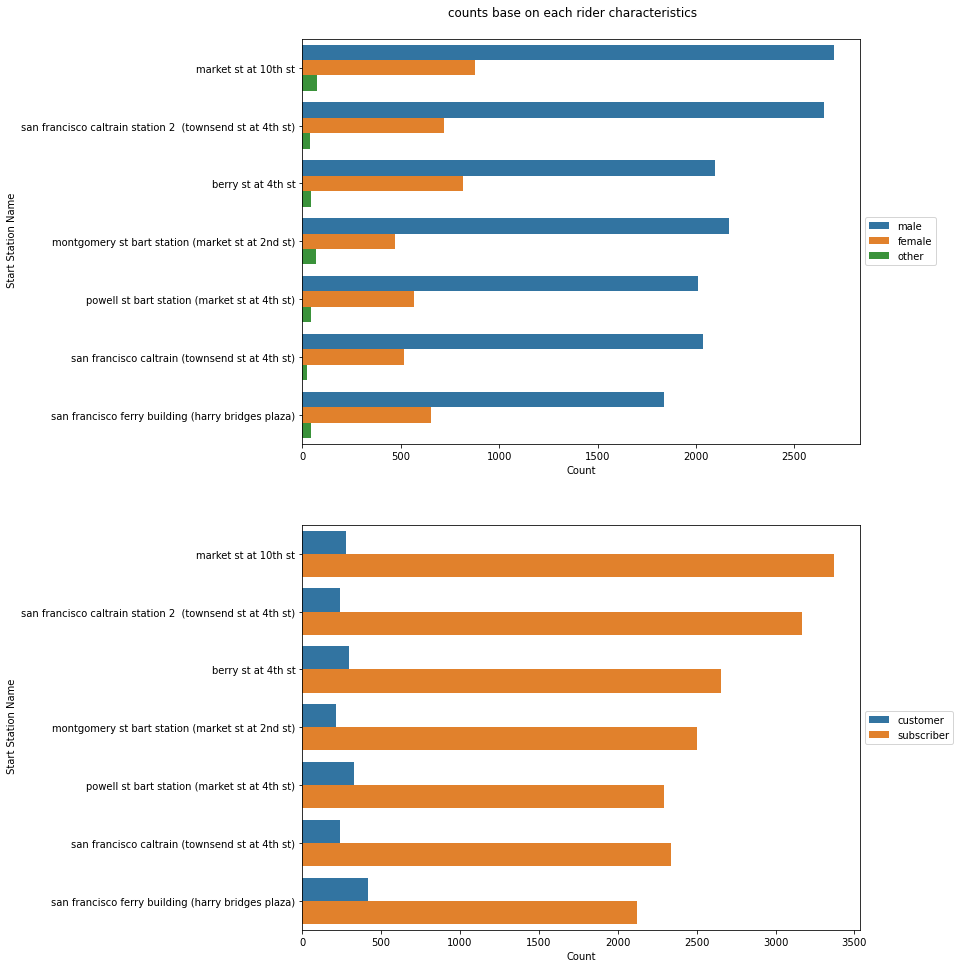

In [317]:
fig=plt.figure(figsize=(10,15))
plt.subplots_adjust(top=0.95)
plt.suptitle('counts base on each rider characteristics', fontsize=12)
for val in range(1,3):
    ax=fig.add_subplot(2,1,val)
    sb.countplot(data=fordge_copy_7, y='start_station_name', hue=attr_var[val-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5));
    plt.ylabel(' Start Station Name');
    plt.xlabel('Count');


from the first plot clearly shows that there are more male rider than female rider across all the 7 station,
and plot 2 shows the activities of the subscribers which is higher than customers across the whole 7 station. at San Francisco Ferry Building(Harry Bridge Plaza the number of customers is more compare to other stations) it might be as a result of tourist center

#### 4. Numeric variables by plotting violin plot to see the distributions

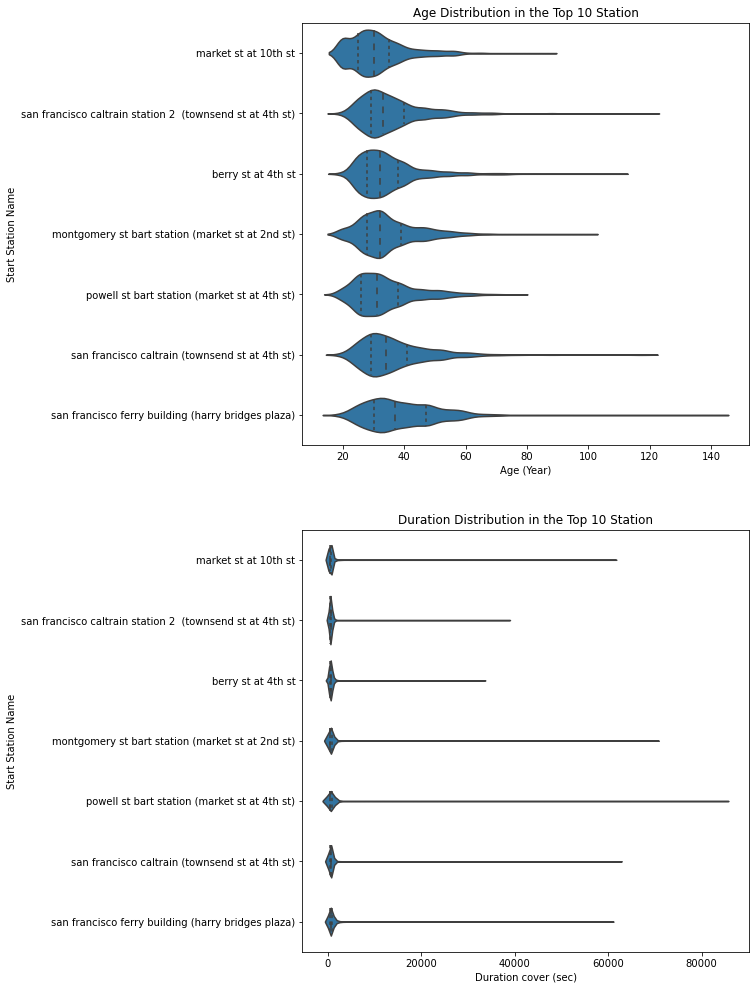

In [318]:
plt.figure(figsize=(8,12))
plt.subplots_adjust(top=1.20)
base_color=sb.color_palette()[0]
ax=plt.subplot(211)
sb.violinplot(data=fordge_copy_7, y='start_station_name', x='member_age', inner='quartile', color=base_color);
plt.xlabel('Age (Year)')
plt.ylabel('Start Station Name')
plt.title('Age Distribution in the Top 10 Station');

ax=plt.subplot(212)
sb.violinplot(data=fordge_copy_7, y='start_station_name', x='duration_sec', inner='quartile', color=base_color);
plt.xlabel('Duration cover (sec)')
plt.ylabel('Start Station Name')
plt.title('Duration Distribution in the Top 10 Station');

the violine plot ploted above shows majority of the data falling within the first half of the data, so i will use log transformation
for proper visualisation i suggest box plot for the duration distribution

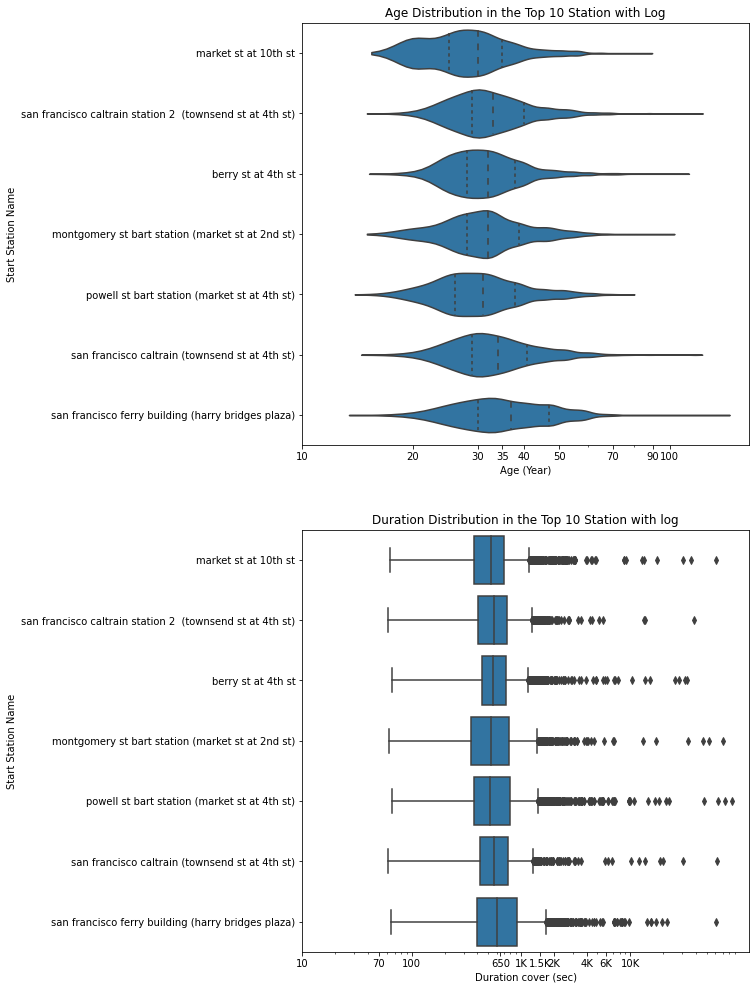

In [319]:
plt.figure(figsize=(8,12))
plt.subplots_adjust(top=1.20)
base_color=sb.color_palette()[0]
ax=plt.subplot(211)
sb.violinplot(data=fordge_copy_7, y='start_station_name', x='member_age', inner='quartile', color=base_color);
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100],[10,20,30,35,40,50,70,90,100])
plt.xlabel('Age (Year)')
plt.ylabel('Start Station Name')
plt.title('Age Distribution in the Top 10 Station with Log');

ax=plt.subplot(212)
sb.boxplot(data=fordge_copy_7, y='start_station_name', x='duration_sec',  color=base_color)
plt.xscale('log')
plt.xticks([10,50,100,650,1000,1500,2000,4000,6000,10000], [10,70,100,650,'1K','1.5K','2K','4K','6K','10K'])
plt.xlabel('Duration cover (sec)')
plt.ylabel('Start Station Name')
plt.title('Duration Distribution in the Top 10 Station with log');

In [320]:
# find the percentage of outliers
len(fordge_copy_7.query('duration_sec >1500')['duration_sec'])/len(fordge_copy_7['duration_sec'])*100

4.07664483331704

After log Transformation the median of age distribution fall between 30-40 years and the median for duration per second fall around 650 sec. with some outlier
The percentage of the outlier for duration second for all second greater than 1500 sec across the selected data  is 4.1%

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
In the selected top 7 stations, considering the time and user types and gender
* Time

Period of the day

it does not relatively show that all the trip across the station take place in the morning, Half of the station has higher trip in the morning while the second half has there trip in the afternoon eg.san francisco caltrain station 2  (townsend st at 4th st), berry st at 4th st,san francisco ferry building (harry bridges plaza) and san francisco caltrain (townsend st at 4th st)   has higher trip in the morning compare to afternoon while market st at 10th st,montgomery st bart station (market st at 2nd st)  and powell st bart station (market st at 4th st)has higher trip in the afternoon. This might be as a result of market located in this area.

Days of the week

most of the trip always occur during the weekday that is from monday to friday and less occurence during the weekend eg. Saturday and Sunday there are some station which has higher values during the weekend compare to other station weekend activities but generally most trip happen during the week days
* User Type

Riders who are subscriber has more trips compare to Rider who are customers, this might be as a result of the pricing, from my resserach i discovered that fordge bike is been hired for  10 Dollars per day while 15 Dollars per month and  149 Dollars  per year once rider subscribe. So most of the riders are frequent users which might be commutters. in some station like san francisco ferry building (harry bridges plaza) it has higher number of customers compare to the remaining six stations
* Gender

The number of male rider across the 7 station is 3 times the number of female riders across the stations


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
The Relationship between member age and duration time is negative correllation. member age from 30-40 are densely populated according to the scatter plot, this means that most of the riders are within the age range of 30-40. this might be because they are workers/commuters. so other group of age are not consider in the data set 

## Multivariate Exploration


In [321]:
# set varible for data with customers as user type 
fordge_4_cust=fordge_copy_7.loc[fordge_copy_7['user_type']=='customer']

In [322]:
# set varible for data with subscribers as user type 
fordge_4_sub=fordge_copy_7.loc[fordge_copy_7['user_type']=='subscriber']

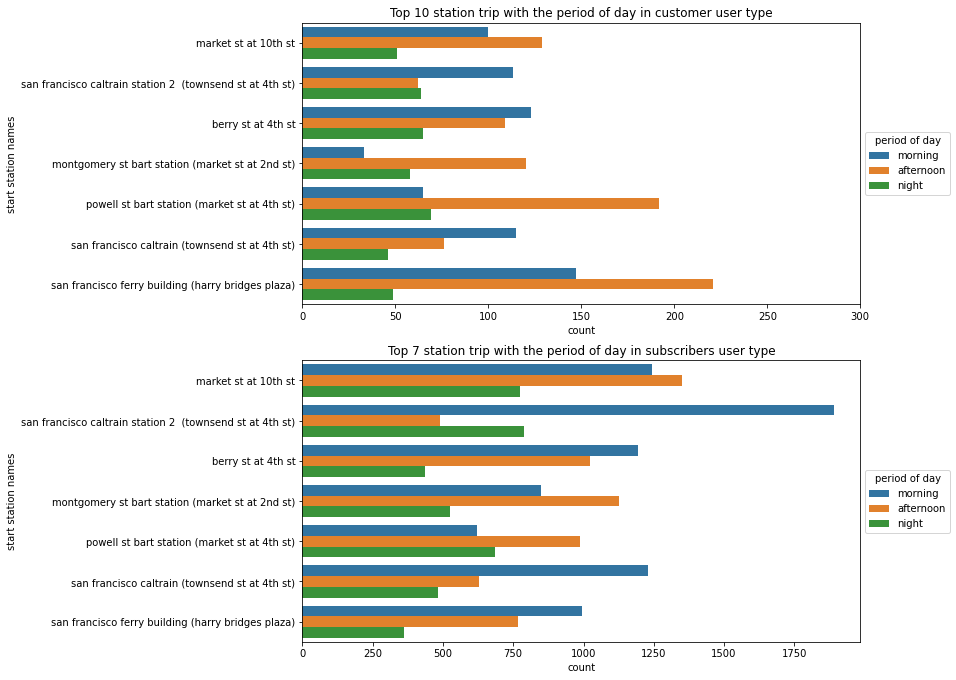

In [323]:
#plot graph of the two dataframe with period of days
plt.figure(figsize=(10,8))
plt.subplots_adjust(top=1.20)
ax=plt.subplot(211)
sb.countplot(data=fordge_4_cust, y='start_station_name', hue='period_day');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),title='period of day');
plt.title('Top 10 station trip with the period of day in customer user type')
plt.xlabel('count')
plt.ylabel('start station names');
plt.xlim(0,300,50);

ax=plt.subplot(212)
sb.countplot(data=fordge_4_sub, y='start_station_name', hue='period_day');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),title='period of day');
plt.title('Top 7 station trip with the period of day in subscribers user type')
plt.xlabel('count')
plt.ylabel('start station names');


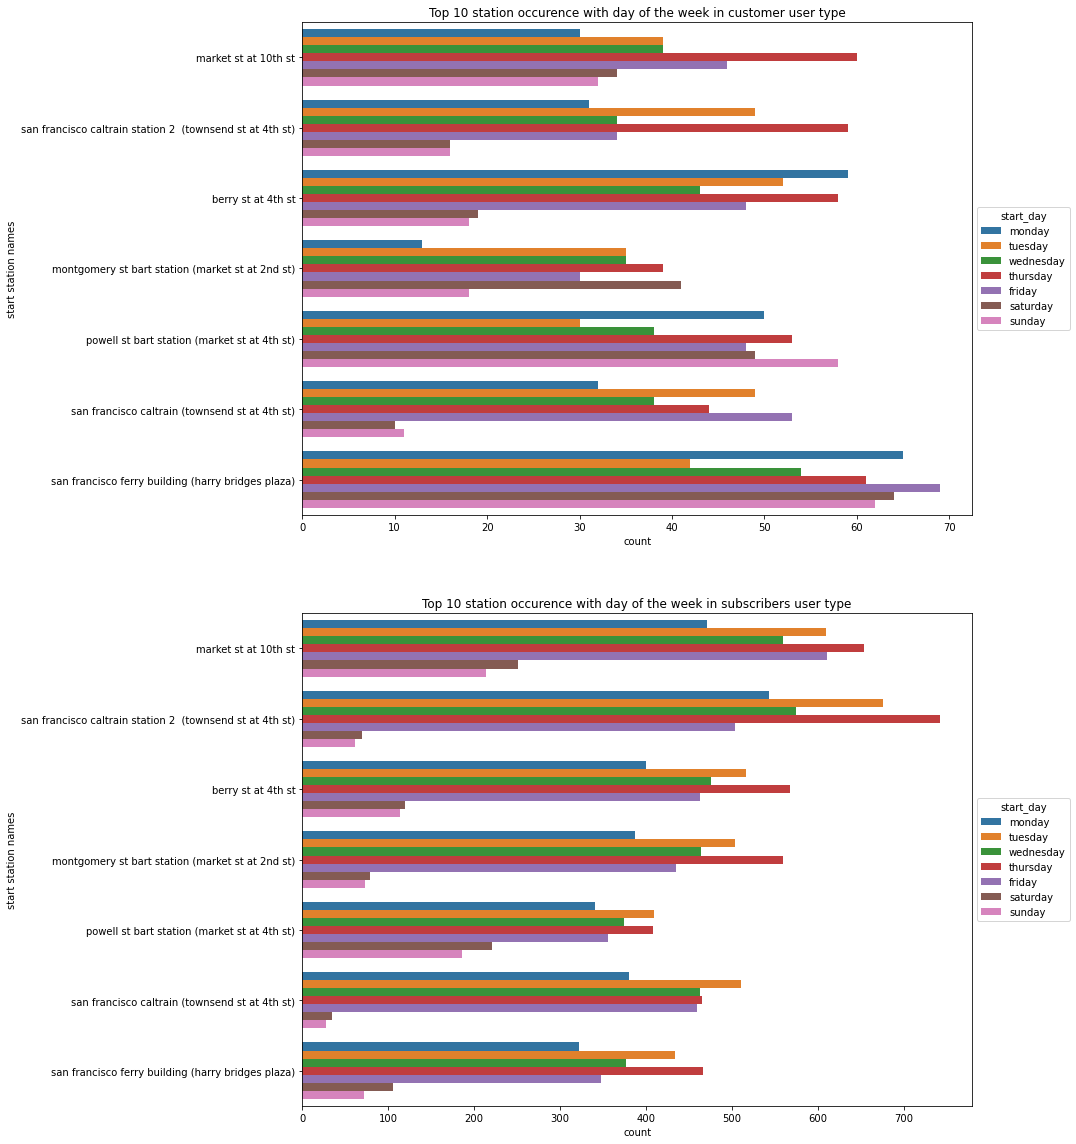

In [324]:
#plot graph of the two dataframe with period of days
plt.figure(figsize=(12,14))
plt.subplots_adjust(top=1.20)
ax=plt.subplot(211)
sb.countplot(data=fordge_4_cust, y='start_station_name', hue='start_day');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),title='start_day');
plt.title('Top 10 station occurence with day of the week in customer user type')
plt.xlabel('count')
plt.ylabel('start station names');

ax=plt.subplot(212)
sb.countplot(data=fordge_4_sub, y='start_station_name', hue='start_day');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),title='start_day');
plt.title('Top 10 station occurence with day of the week in subscribers user type')
plt.xlabel('count')
plt.ylabel('start station names');

There are some interesting finding after separating the two user type and investigating them with the two main time factor
period of the day: for both customers and suscriber most trip occur in the morning or afternoon.

days of the week: in this case customer has more trip during the weekend,especially in 'powell st bart station (market st at 4th st)','san francisco ferry building (harry bridges plaza)'   the customers here can be a site viewer or tourist. 
but for the subscribers, trips occur mostly during the week days which shows the subscriber are mostly commutters.

In [325]:
male=fordge_copy_7.loc[fordge_copy_7['member_gender']=='male']
male.shape

(15500, 24)

In [326]:
female=fordge_copy_7.loc[fordge_copy_7['member_gender']=='female']
female.shape

(4621, 24)

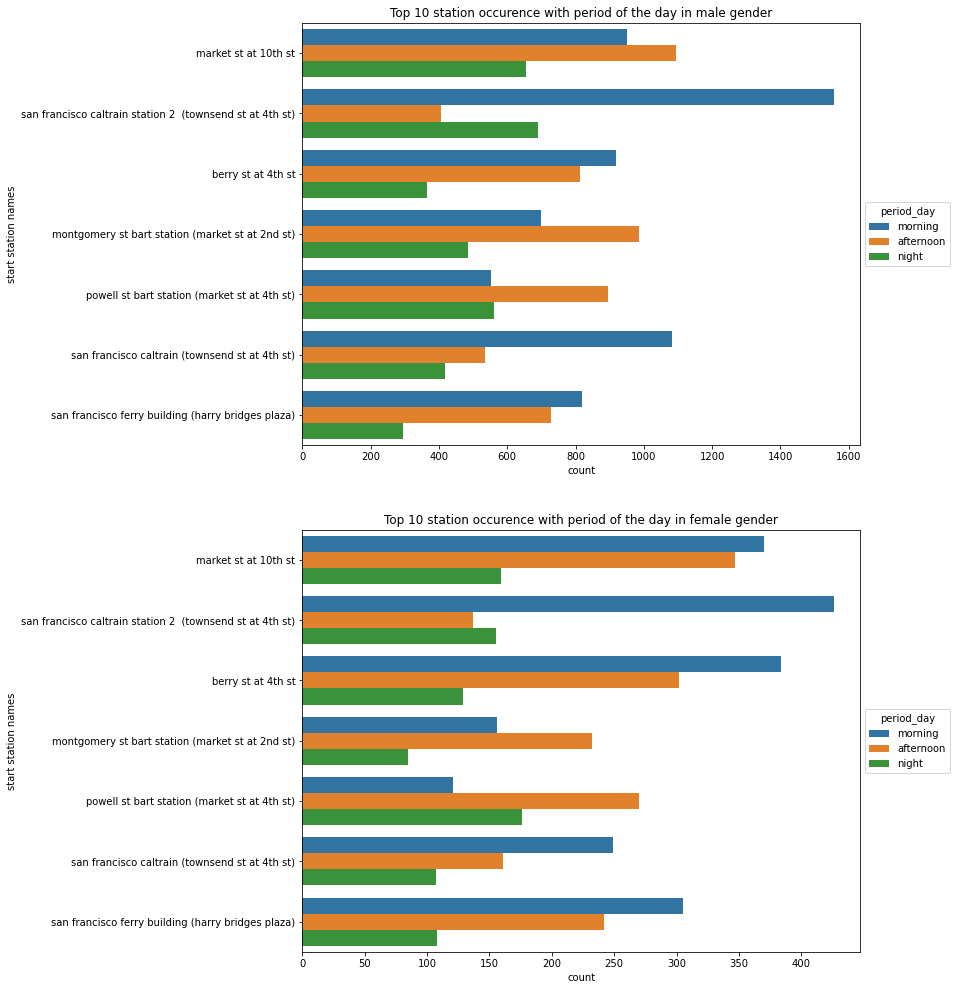

In [327]:
plt.figure(figsize=(10,12))
plt.subplots_adjust(top=1.20);
ax=plt.subplot(211)
sb.countplot(data=male, y='start_station_name', hue='period_day');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),title='period_day');
plt.title('Top 10 station occurence with period of the day in male gender')
plt.xlabel('count')
plt.ylabel('start station names');

ax=plt.subplot(212)
sb.countplot(data=female, y='start_station_name',hue='period_day');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),title='period_day');
plt.title('Top 10 station occurence with period of the day in female gender')
plt.xlabel('count')
plt.ylabel('start station names');


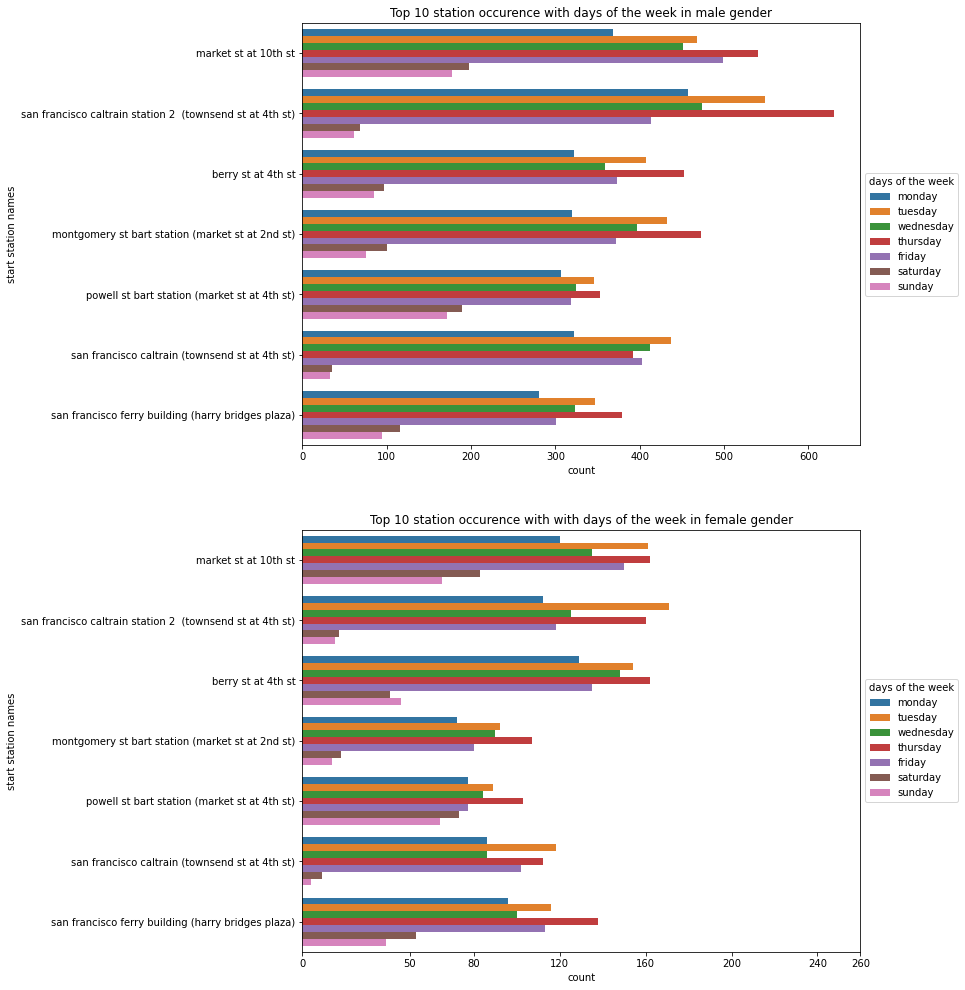

In [328]:
plt.figure(figsize=(10,12))
plt.subplots_adjust(top=1.20);
ax=plt.subplot(211)
sb.countplot(data=male, y='start_station_name',hue='start_day');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),title='days of the week');
plt.title('Top 10 station occurence with days of the week in male gender')
plt.xlabel('count')
plt.ylabel('start station names');

ax=plt.subplot(212)
sb.countplot(data=female, y='start_station_name',hue='start_day');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),title='days of the week');
plt.title('Top 10 station occurence with with days of the week in female gender')
plt.xticks([0,50,80,120,160, 200, 240,260],[0,50,80,120,160, 200, 240,260])
plt.xlabel('count')
plt.ylabel('start station names');

after analysing the gender data with the time variable there is no any distint difference between them but we all know that the male rider has higher frequency to female riders

#### investigate the distribution of age across the top 7 stations

In [329]:
fordge_copy_7.groupby('start_station_name')['start_station_id'].value_counts()

start_station_name                                         start_station_id
market st at 10th st                                       58                  3649
san francisco caltrain station 2  (townsend st at 4th st)  67                  3408
berry st at 4th st                                         81                  2952
montgomery st bart station (market st at 2nd st)           21                  2711
powell st bart station (market st at 4th st)               3                   2620
san francisco caltrain (townsend st at 4th st)             30                  2577
san francisco ferry building (harry bridges plaza)         15                  2541
Name: start_station_id, dtype: int64

In [330]:
x=fordge_copy_7['start_station_id'].value_counts()
x_order=x.index
x_order

Index(['58', '67', '81', '21', '3', '30', '15'], dtype='object')

<Figure size 432x288 with 0 Axes>

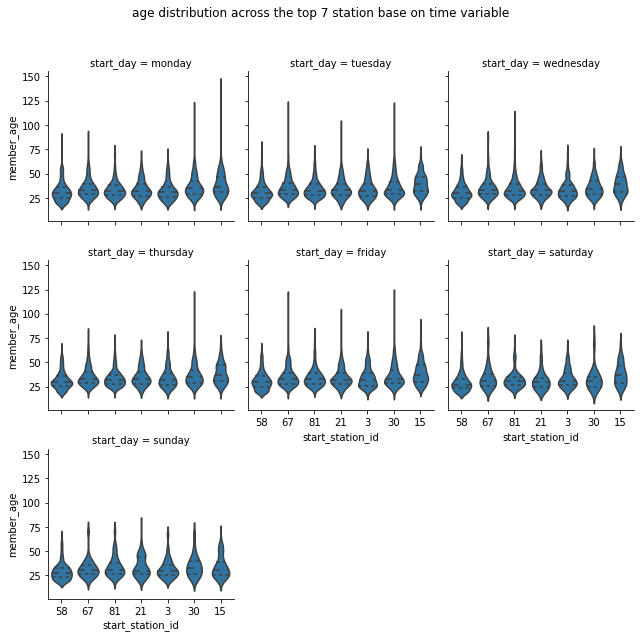

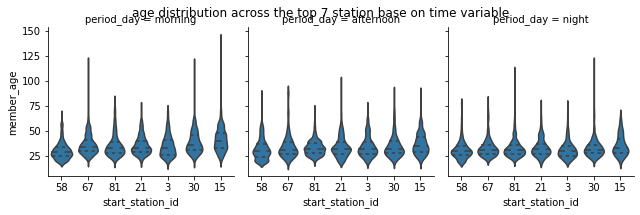

In [331]:
default_color = sb.color_palette()[0]
for i in range(1,3):
    plt.subplots_adjust(top=0.88);
    g=sb.FacetGrid(data=fordge_copy_7, col=time_var[i-1], col_wrap=3)
    g.map(sb.violinplot,'start_station_id','member_age',inner='quartile', color=default_color, order=x_order);
    g.fig.suptitle('age distribution across the top 7 station base on time variable');

<Figure size 432x288 with 0 Axes>

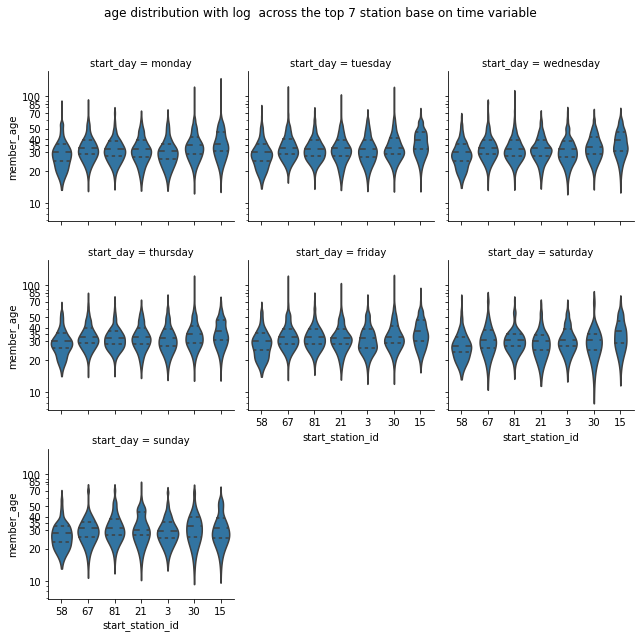

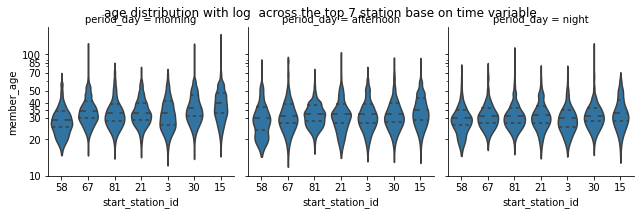

In [332]:
# using log transformation
default_color = sb.color_palette()[0]
for i in range(1,3):
    plt.subplots_adjust(top=0.88)
    g=sb.FacetGrid(data=fordge_copy_7, col=time_var[i-1], col_wrap=3)
    g.map(sb.violinplot,'start_station_id','member_age',inner='quartile', color=default_color, order=x_order)
    g.fig.suptitle('age distribution with log  across the top 7 station base on time variable');
    plt.yscale('log')
    plt.yticks([10,20,30,35,40,50,70,85,100],[10,20,30,35,40,50,70,85,100])

the distribution of age falls between 30 and 40 years, 

#### Investigate the distribution of duration across the top 7 station in respect to time variable

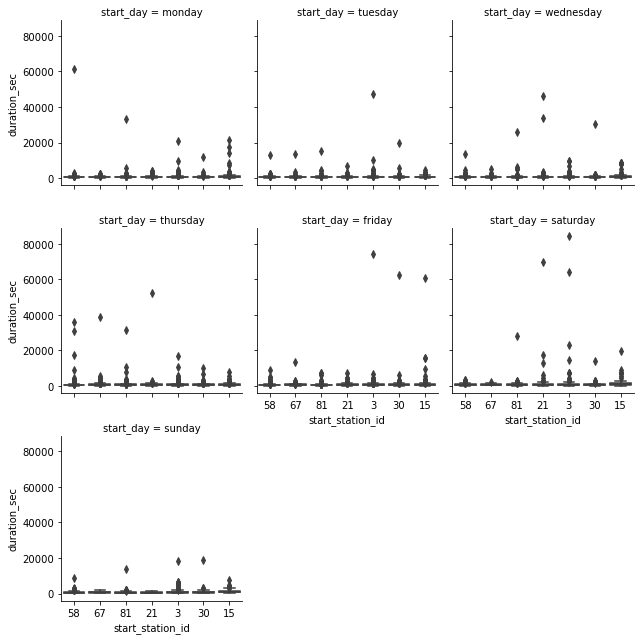

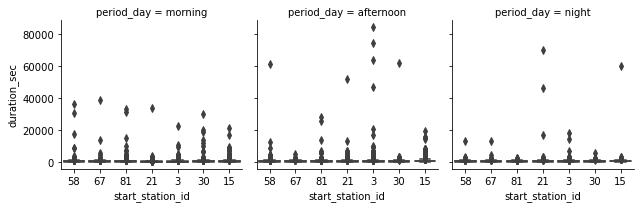

In [333]:
## let plot distribution of duration_sec against station id across the time variable
default_color = sb.color_palette()[0]
for i in range(1,3):
    g=sb.FacetGrid(data=fordge_copy_7, col=time_var[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id','duration_sec', color=default_color, order=x_order)

from the box plot, the activities falls between 0-20000 so i will use log transformation on the y-axis to help better visualisation

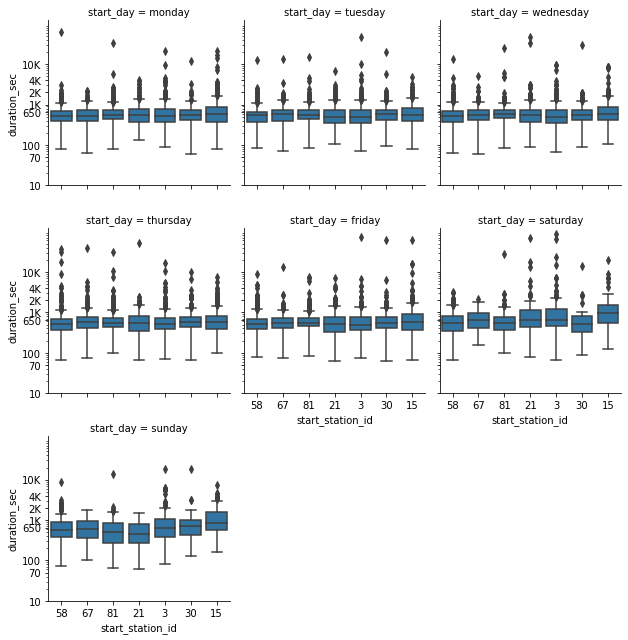

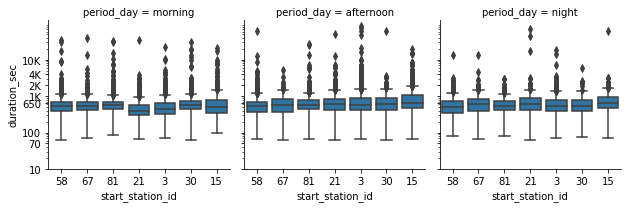

In [334]:
default_color = sb.color_palette()[0]
for i in range(1,3):
    g=sb.FacetGrid(data=fordge_copy_7, col=time_var[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id','duration_sec', color=default_color, order=x_order)
    plt.yscale('log')
    plt.yticks([10,50,100,650,1000,2000,4000,10000], [10,70,100,650,'1K','2K','4K','10K'])

after log transformation the trip across most stations are longer during the week end which means that user type has an influence in the data

In [335]:
fordge_4_cust['duration_sec'].describe()

count     2007.000000
mean      1328.238665
std       3214.969194
min         66.000000
25%        541.000000
50%        784.000000
75%       1236.500000
max      69980.000000
Name: duration_sec, dtype: float64

In [336]:
fordge_4_sub['duration_sec'].describe()

count    18451.000000
mean       650.452984
std       1454.074145
min         61.000000
25%        380.000000
50%        535.000000
75%        729.000000
max      84548.000000
Name: duration_sec, dtype: float64

<Figure size 432x288 with 0 Axes>

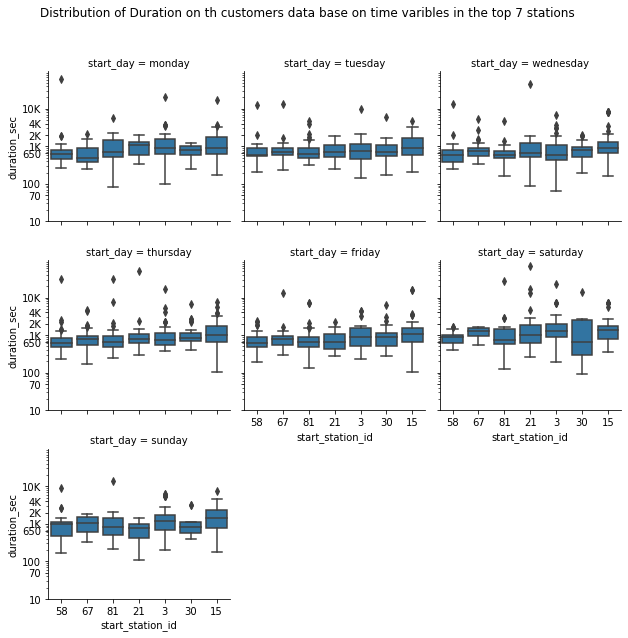

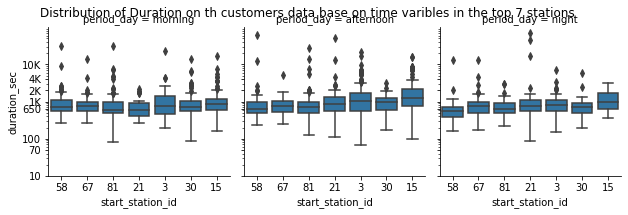

In [337]:
# using the two user type subscriber and customer
default_color = sb.color_palette()[0]
for i in range(1,3):
    plt.subplots_adjust(top=0.88)
    g=sb.FacetGrid(data=fordge_4_cust, col=time_var[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id','duration_sec', color=default_color, order=x_order)
    g.fig.suptitle('Distribution of Duration on th customers data base on time varibles in the top 7 stations');
    plt.yscale('log')
    plt.yticks([10,50,100,650,1000,2000,4000,10000], [10,70,100,650,'1K','2K','4K','10K'])

The duration of customers during weekend has a mean value above 1000 sec that is above the actual mean which is 650 same thing goes for some station id trip duration base on the period of the days which are between 650-1k

<Figure size 432x288 with 0 Axes>

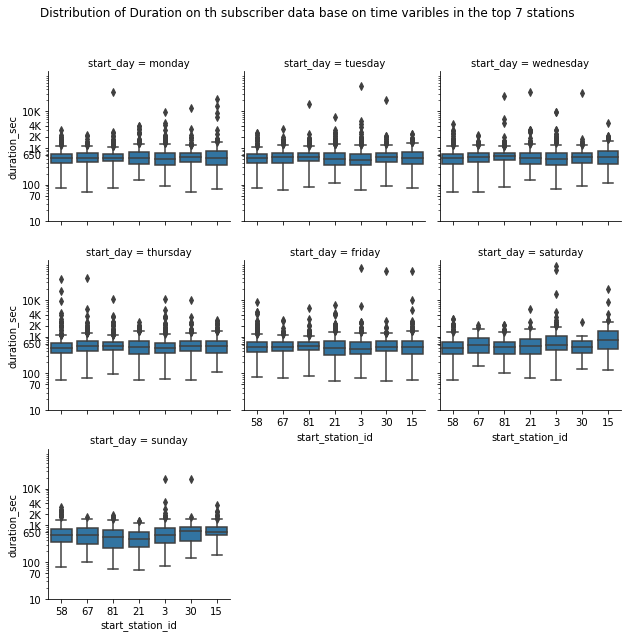

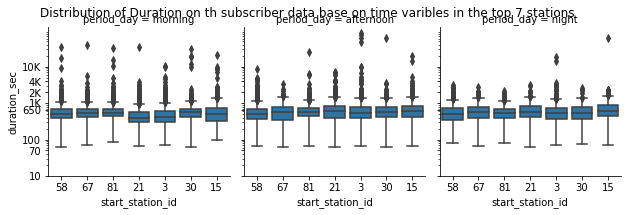

In [338]:
default_color = sb.color_palette()[0]
for i in range(1,3):
    plt.subplots_adjust(top=0.88);
    g=sb.FacetGrid(data=fordge_4_sub, col=time_var[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id','duration_sec', color=default_color, order=x_order)
    g.fig.suptitle('Distribution of Duration on th subscriber data base on time varibles in the top 7 stations');
    plt.yscale('log')
    plt.yticks([10,50,100,650,1000,2000,4000,10000], [10,70,100,650,'1K','2K','4K','10K'])

Unlike the customers data that most average duration is between 650-1k the subscriber data has uniform average duration across the 7 stations
which means that the subscriber are residence of San Fransisco which make use of the ride for their daily activities. i.e The commuter

### SUMMARY

### The relationships  observed in this part of the investigation. 
After separating the two user types, that is subscriber and customers the time variable has effect on the data set, the distribution of duration in sec has a mean value above 1000 sec in customers data during the weekend which means that the customers as the user type  are tourist.
stations like powell st bart station (market st at 4th st)  and san francisco ferry building (harry bridges plaza) has a longer average duration in customers, this prove to us more that the customers that visted this areas are there for site viewing and shopping.
while for subscriber user type maintain an average duration of 650seconds all through with time varibles in subscriber 
 
###  Interesting or surprising interactions between features?
Based on the user types, the boxplots show a significant trends. It also influence the duration of trips. The average duration in customers is above 1000 seconds, which are longer than the subscribers with average duration of 650 seconds

start_station_name                                         start_station_id
market st at 10th st                                       58                  3649
san francisco caltrain station 2  (townsend st at 4th st)  67                  3408
berry st at 4th st                                         81                  2952
montgomery st bart station (market st at 2nd st)           21                  2711
powell st bart station (market st at 4th st)               3                   2620
san francisco caltrain (townsend st at 4th st)             30                  2577
san francisco ferry building (harry bridges plaza)         15                  2541
Name: start_station_id, dtype: int64

## Conclusions
In conclussion user types contributed to the trip durations, trip made during the weekend by customers users has longer durations. most of this customers are tourist or site viewers, although majority of the users are commuters(subscribers)
